In [123]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()



In [124]:
df=pd.read_csv('fcc-forum-pageviews.csv',parse_dates=['date'],index_col='date')
df.columns=['Page Views']

In [125]:
df=df[~((df['Page Views']>df['Page Views'].quantile(0.975)) | (df['Page Views']<df['Page Views'].quantile(0.025)))]

In [126]:
df = df=df[~((df['Page Views']>df['Page Views'].quantile(0.975)) | (df['Page Views']<df['Page Views'].quantile(0.025)))]
df['Month']=df.index.month_name()
df['Year']=df.index.year
df['Month_num']=df.index.month

df.sort_values(by=['Month_num','Year'],inplace=True)

### lineplot

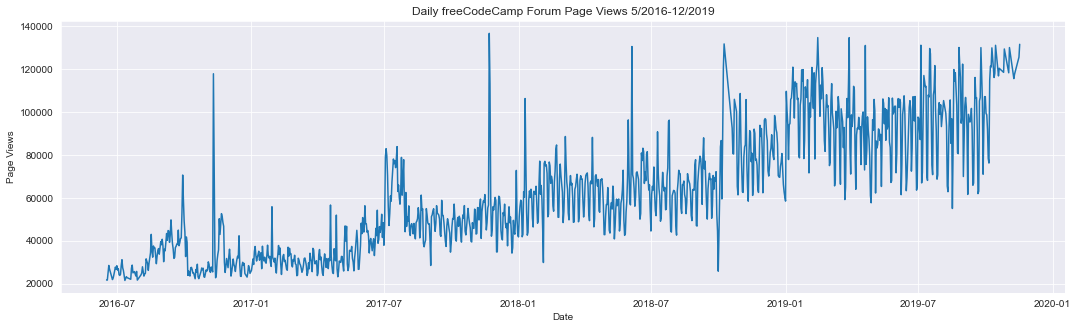

In [128]:
plt.figure(figsize=(18,5))
sns.lineplot(y='Page Views',x='date',data=df)
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel('Date')
plt.savefig('Portfo_line.png')

### Bar

In [129]:
df_bar=df.groupby(['Year','Month','Month_num'],as_index=False).mean().sort_values(by=['Month_num','Year'])

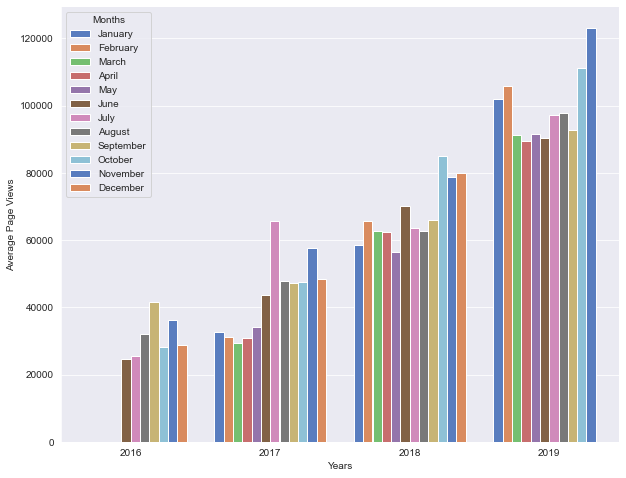

In [130]:
plt.figure(figsize=(10,8))
sns.barplot(x='Year',y='Page Views',data=df_bar,hue='Month',palette='muted')
plt.legend(loc='upper left')
plt.xlabel("Years")
plt.ylabel("Average Page Views")
plt.legend(title='Months',loc='upper left')
sns.despine()
sns.set_style('darkgrid')
plt.savefig('port-bar2')

### boxplot

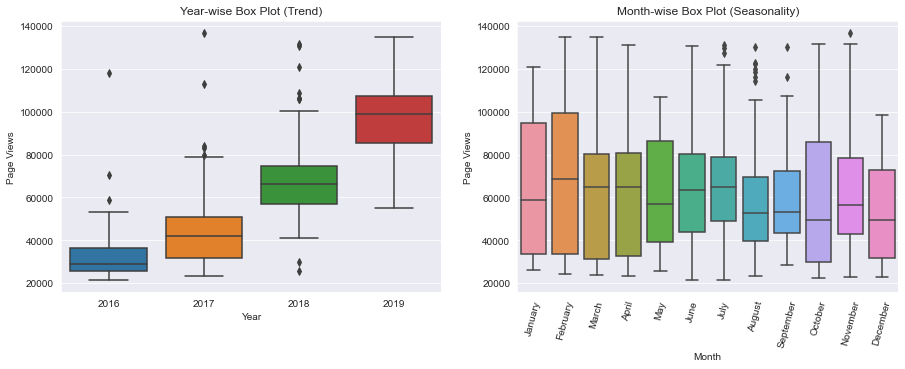

In [132]:
fig,axis=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.boxplot(y='Page Views',x='Year',data=df,ax=axis[0])
sns.boxplot(y='Page Views',x='Month',data=df,ax=axis[1])
axis[0].set_title("Year-wise Box Plot (Trend)")
axis[1].set_title("Month-wise Box Plot (Seasonality)")
plt.xticks(rotation=75)
plt.savefig('port-boxplot.png')
plt.show()